In [1]:
import os
from glob import glob
from tropical_cyclones import plot_hist_cat, plot_press_wind

Finally plot all TCs tracks found in the simulation

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/work/tc/fullres/IFS/tco1279-orca025-cycle3/tempest_fullres_txt/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 296 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/work/tc/fullres/IFS/tco2559-ng5-cycle3/tempest_fullres_txt/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 232 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/work/tc/ERA5/ERA5_TC_tracks_2000_2021.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 1712 trajectories
... done reading data


/home/b/b382216/AQUA/diagnostics/tropical_cyclones/tropical_cyclones/plots/plotting_hist.py:28: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv(ibtracs_file)


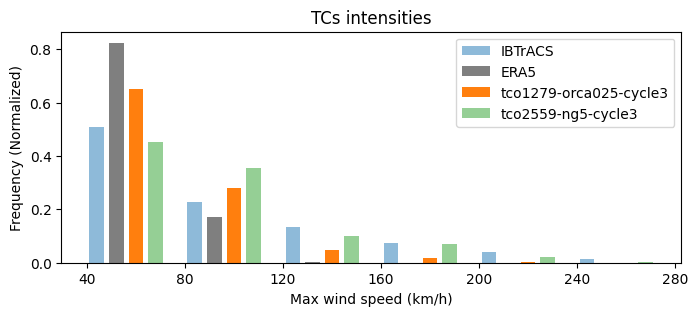

In [2]:
dir_tco1279 = "/home/b/b382216/work/tc/fullres/IFS/tco1279-orca025-cycle3/tempest_fullres_txt"
dir_tco2559 = "/home/b/b382216/work/tc/fullres/IFS/tco2559-ng5-cycle3/tempest_fullres_txt"
dir_ERA5 = "/home/b/b382216/work/tc/ERA5"
dir_ibtracs="/home/b/b382216/work/tc/ibtracs"

def merge_files(input_files, output_file):
    with open(output_file, 'w') as output:
        for file in input_files:
            with open(file) as input_file:
                output.writelines(input_file.readlines())

filenames_tco1279 = sorted(glob(os.path.join(dir_tco1279, "fullres_tempest_track*.txt")))
filenames_tco2559 = sorted(glob(os.path.join(dir_tco2559, "fullres_tempest_track*.txt")))

tracks_file_tco1279 = os.path.join(dir_tco1279, "tempest_tracks_tot.txt")
tracks_file_tco2559 = os.path.join(dir_tco2559, "tempest_tracks_tot.txt")
tracks_file_ERA5 = os.path.join(dir_ERA5, "ERA5_TC_tracks_2000_2021.txt")
tracks_file_ibtracs = os.path.join(dir_ibtracs, "ibtracs.since1980.list.v04r00.csv")

merge_files(filenames_tco1279, tracks_file_tco1279)
merge_files(filenames_tco2559, tracks_file_tco2559)

plot_hist_cat(tracks_file_tco1279, tracks_file_tco2559, tracks_file_ERA5, tracks_file_ibtracs)

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/work/tc/fullres/IFS/tco1279-orca025-cycle3/tempest_fullres_txt/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 296 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/work/tc/fullres/IFS/tco2559-ng5-cycle3/tempest_fullres_txt/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 232 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/work/tc/ERA5/ERA5_TC_tracks_2000_2021.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 1712 trajectories
... done reading data


/home/b/b382216/AQUA/diagnostics/tropical_cyclones/tropical_cyclones/plots/plotting_hist.py:108: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv(ibtracs_file)


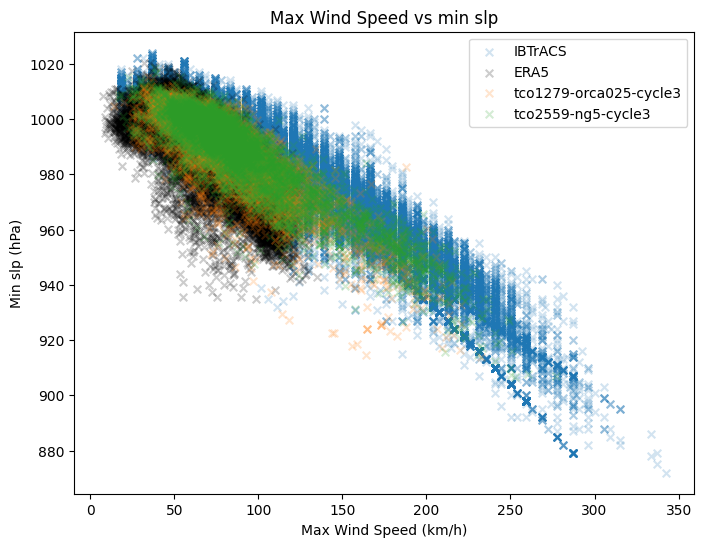

In [3]:
plot_press_wind(tracks_file_tco1279, tracks_file_tco2559,tracks_file_ERA5, tracks_file_ibtracs, dot_dim=5)